Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



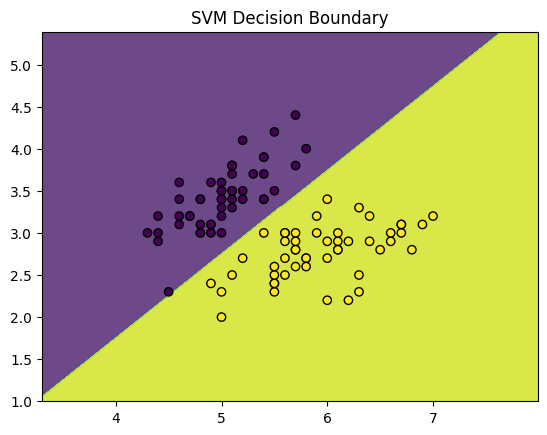

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for visualization
y = iris.target

# Only use two classes
X = X[y < 2]
y = y[y < 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='linear', C=1.0)  # Linear kernel
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm)


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')

# Data preprocessing
# Add a binary target column: 1 for "Good" (quality >= 6), 0 for "Bad" (quality < 6)
wine_data['quality_label'] = (wine_data['quality'] >= 6).astype(int)

# Features and target
X = wine_data.drop(columns=['quality', 'quality_label'])
y = wine_data['quality_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualizing feature importance using coefficients (linear kernel only)
if svm.kernel == 'linear':
    feature_importance = pd.DataFrame({'Feature': wine_data.columns[:-2], 'Coefficient': svm.coef_[0]})
    feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
    print("\nFeature Importance:\n", feature_importance)


Confusion Matrix:
 [[167  56]
 [ 66 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       223
           1       0.77      0.74      0.76       257

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480


Accuracy Score: 0.7458333333333333


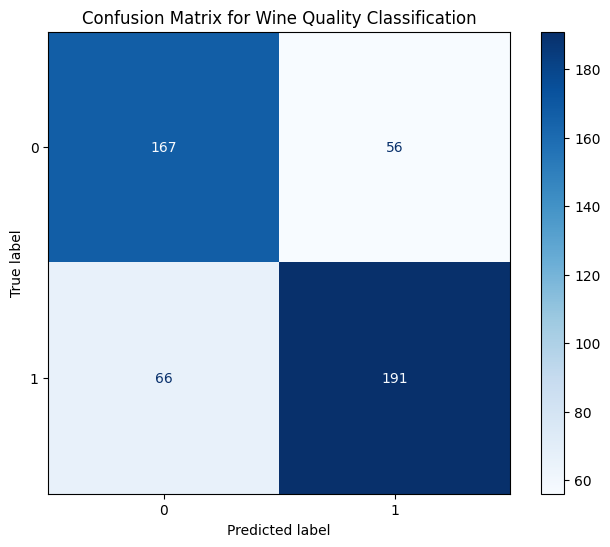

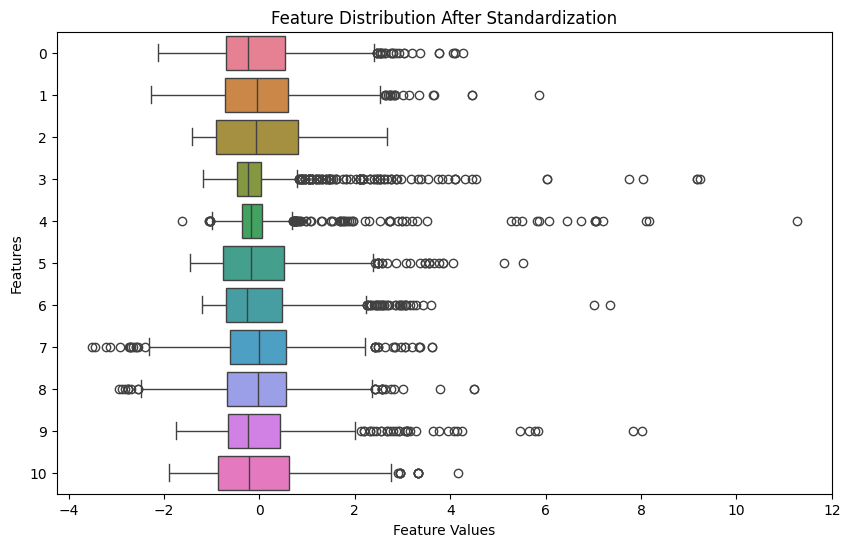

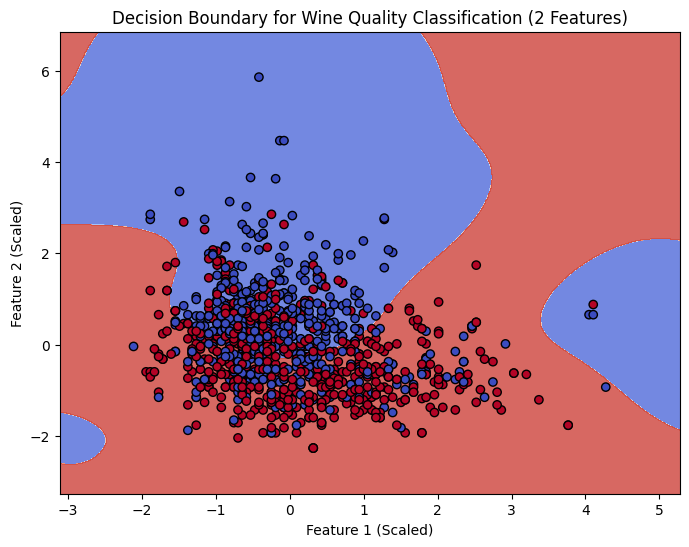

In [3]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Wine Quality dataset again for visualization
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')

# Preprocessing for visualization
wine_data['quality_label'] = (wine_data['quality'] >= 6).astype(int)
X = wine_data.drop(columns=['quality', 'quality_label'])
y = wine_data['quality_label']

# Split and scale the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Re-train the SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix for Wine Quality Classification")
plt.show()

# Feature distribution visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=X_train, orient="h", ax=ax)
plt.title("Feature Distribution After Standardization")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.show()

# Decision boundary visualization (using only 2 features for simplicity)
X_two_features = X.iloc[:, :2]
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_two_features, y, test_size=0.3, random_state=42, stratify=y
)
X_train_two_scaled = scaler.fit_transform(X_train_two)
X_test_two_scaled = scaler.transform(X_test_two)

svm_two_features = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_two_features.fit(X_train_two_scaled, y_train_two)

# Plot decision boundary
x_min, x_max = X_train_two_scaled[:, 0].min() - 1, X_train_two_scaled[:, 0].max() + 1
y_min, y_max = X_train_two_scaled[:, 1].min() - 1, X_train_two_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_two_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_two_scaled[:, 0], X_train_two_scaled[:, 1], c=y_train_two, edgecolors="k", cmap=plt.cm.coolwarm)
plt.title("Decision Boundary for Wine Quality Classification (2 Features)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()


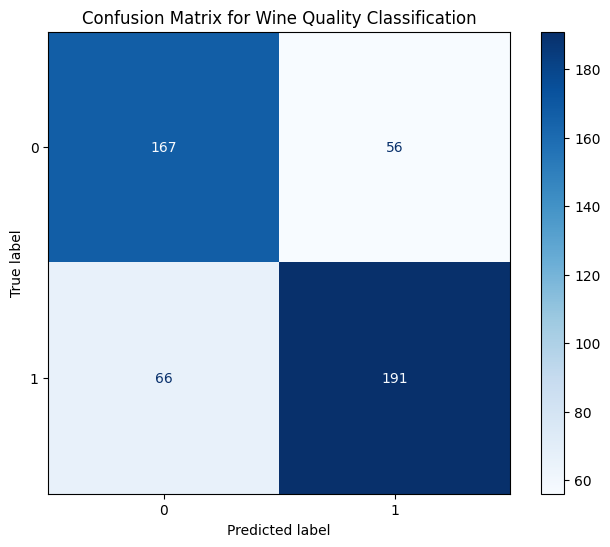

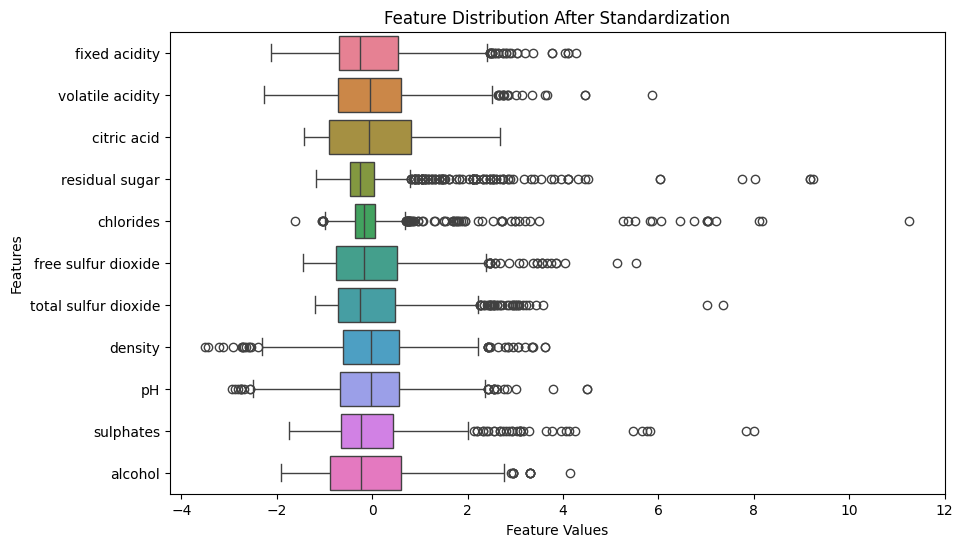

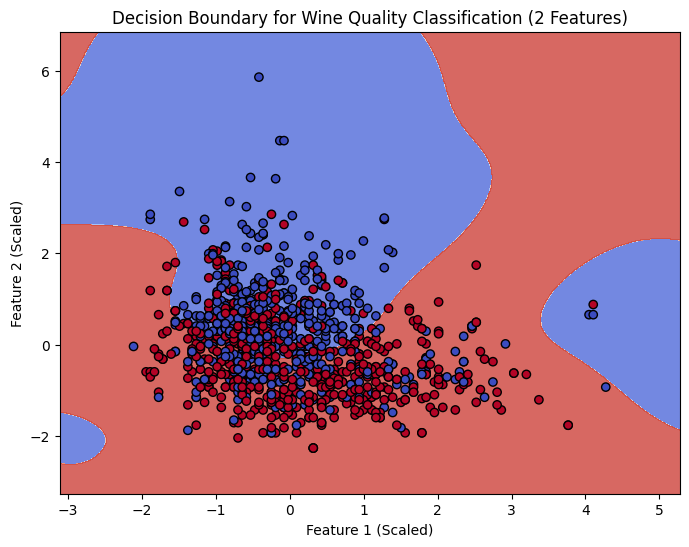

In [4]:
# Re-import necessary libraries for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Wine Quality dataset again for visualization
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')

# Preprocessing for visualization
wine_data['quality_label'] = (wine_data['quality'] >= 6).astype(int)
X = wine_data.drop(columns=['quality', 'quality_label'])
y = wine_data['quality_label']

# Split and scale the dataset
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Re-train the SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix for Wine Quality Classification")
plt.show()

# Feature distribution visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_train, columns=X.columns), orient="h", ax=ax)
plt.title("Feature Distribution After Standardization")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.show()

# Decision boundary visualization (using only 2 features for simplicity)
X_two_features = X.iloc[:, :2]
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_two_features, y, test_size=0.3, random_state=42, stratify=y
)
X_train_two_scaled = scaler.fit_transform(X_train_two)
X_test_two_scaled = scaler.transform(X_test_two)

svm_two_features = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_two_features.fit(X_train_two_scaled, y_train_two)

# Plot decision boundary
x_min, x_max = X_train_two_scaled[:, 0].min() - 1, X_train_two_scaled[:, 0].max() + 1
y_min, y_max = X_train_two_scaled[:, 1].min() - 1, X_train_two_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_two_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_two_scaled[:, 0], X_train_two_scaled[:, 1], c=y_train_two, edgecolors="k", cmap=plt.cm.coolwarm)
plt.title("Decision Boundary for Wine Quality Classification (2 Features)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()


In [5]:
# Display SVM model summary
print("SVM Model Summary:")
print(f"Kernel: {svm.kernel}")
print(f"Regularization Parameter (C): {svm.C}")
print(f"Gamma: {svm.gamma}")
print(f"Number of Support Vectors: {svm.n_support_}")
print(f"Class Labels: {svm.classes_}")
print(f"Support Vectors:\n{svm.support_vectors_}")


SVM Model Summary:
Kernel: rbf
Regularization Parameter (C): 1.0
Gamma: scale
Number of Support Vectors: [336 346]
Class Labels: [0 1]
Support Vectors:
[[-0.98439828  1.51675672 -1.26513198 ...  1.33170692 -0.95618992
   1.63891107]
 [ 0.31625671  1.93417505 -0.74740133 ...  0.81383375 -0.83502164
   0.98686506]
 [-1.38024979  0.65409216 -0.79917439 ...  1.65537765  0.31607705
  -0.22407751]
 ...
 [-0.30579568 -0.15291661  0.13274077 ... -0.02771015 -0.59268507
  -0.03777866]
 [-1.09749871  0.90454316 -1.42045117 ...  1.00803619 -0.7744375
   2.29095707]
 [ 0.82520866 -0.15291661  0.33983303 ... -0.48084917 -0.35034851
  -0.68982466]]


In [6]:
# Total instances in the dataset
print(f"Total instances in the dataset: {len(wine_data)}")




Total instances in the dataset: 1599


In [7]:
# Instances in training and testing sets
print(f"Total instances in training set: {len(X_train)}")
print(f"Total instances in testing set: {len(X_test)}")

Total instances in training set: 1119
Total instances in testing set: 480


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
dataset = pd.read_csv('/Users/rahatrihan/Desktop/AIUB/data mining/Social_Network_Ads.csv')


In [13]:
print(dataset.head())
print(dataset.info())
print(dataset.describe())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10

In [14]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[64  4]
 [ 3 29]]


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.93


In [21]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



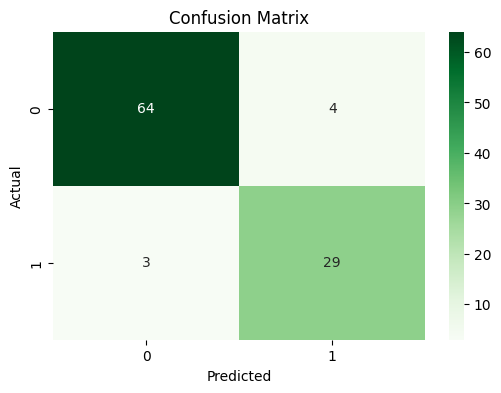

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


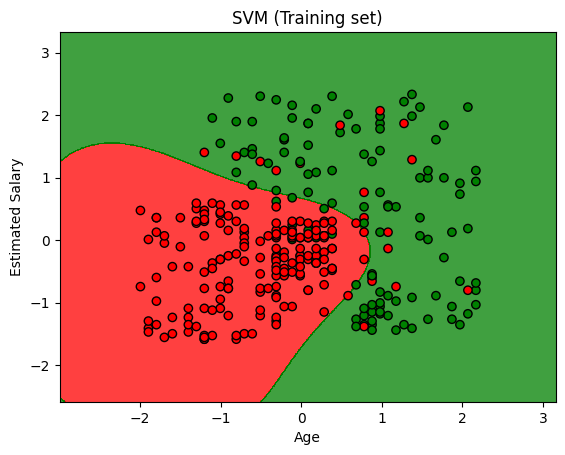

In [24]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolors='k', cmap=ListedColormap(('red', 'green')))
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()


Accuracy: 0.9300
Log Loss: 0.1955


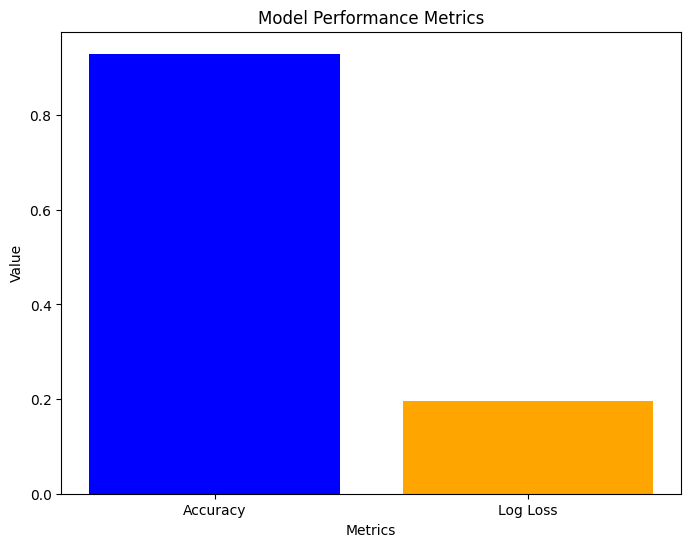

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Load dataset
# Replace with your actual path or use a sample dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)  # Enable probability estimates
svm.fit(X_train, y_train)

# Predict probabilities and classes
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)  # Probabilities for log loss

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate log loss
loss = log_loss(y_test, y_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {loss:.4f}")

# Visualize accuracy and loss
metrics = {'Accuracy': accuracy, 'Log Loss': loss}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.show()
